Agrupando os países usando o aprendizado não supervisionado para a HELP International

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)

# from google.colab import files
# uploaded = files.upload()
# df= pd.read_csv("country-data.csv")

In [ ]:
# from google.colab import files
# uploaded = files.upload()
# df= pd.read_csv("country-data.csv")
# data_dict = pd.read_csv("data-dictionary.csv")

In [ ]:
df= pd.read_csv("country-data.csv")
data_dict = pd.read_csv("data-dictionary.csv")

In [ ]:
with pd.option_context('display.max_colwidth', None):
  display(data_dict)

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


In [ ]:
columns = {'country':'pais','child_mort':'mortalidade_infantil', 'exports':'exportacao',
            'health':'saude', 'imports':'importacao', 'income':'renda', 'inflation':'inflacao',
            'life_expec':'expectativa_vida', 'total_fer':'taxa_fecundidade', 'gdpp':'pib'
}
df.rename(columns=columns, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   pais                  167 non-null    object 
 1   mortalidade_infantil  167 non-null    float64
 2   exportacao            167 non-null    float64
 3   saude                 167 non-null    float64
 4   importacao            167 non-null    float64
 5   renda                 167 non-null    int64  
 6   inflacao              167 non-null    float64
 7   expectativa_vida      167 non-null    float64
 8   taxa_fecundidade      167 non-null    float64
 9   pib                   167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
a=(df.isnull().sum() / df.shape[0] * 100).round(2).sort_values(ascending=False)
a[a>0]

Series([], dtype: float64)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mortalidade_infantil,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exportacao,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
saude,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
importacao,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
renda,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflacao,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
expectativa_vida,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
taxa_fecundidade,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
pib,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


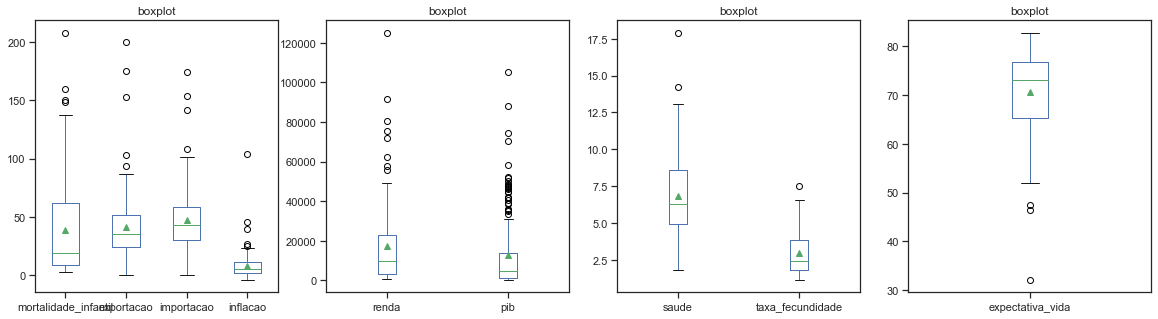

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(20,5))

df[['mortalidade_infantil', 'exportacao',  'importacao',  'inflacao']].plot(kind='box', title='boxplot', showmeans=True, ax=ax[0])
df[['renda',  'pib']].plot(kind='box', title='boxplot', showmeans=True, ax=ax[1])
ax2=df[['saude','taxa_fecundidade']].plot(kind='box', title='boxplot', showmeans=True, ax=ax[2])
ax3=df[['expectativa_vida']].plot(kind='box', title='boxplot', showmeans=True, ax=ax[3])
plt.show()

In [ ]:
# Cada linha se refere a um país
df['pais'].nunique()

167

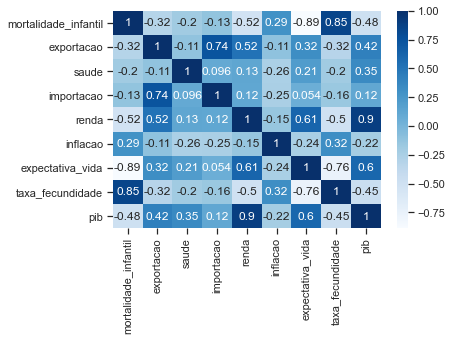

In [ ]:
sns.heatmap(df.corr(), cmap="Blues", annot=True);

In [ ]:
df_agrupar = df.drop(['pais'], axis=1).copy()

df_agrupar.head()

,mortalidade_infantil,exportacao,saude,importacao,renda,inflacao,expectativa_vida,taxa_fecundidade,pib
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
# Normalizando
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
array_scaler = scaler.fit_transform(df_agrupar)
print(array_scaler)

[[0.42648491 0.04948197 0.35860783 ... 0.47534517 0.73659306 0.00307343]
 [0.06815969 0.13953104 0.29459291 ... 0.87179487 0.07886435 0.03683341]
 [0.12025316 0.1915594  0.14667495 ... 0.87573964 0.27444795 0.04036499]
 ...
 [0.10077897 0.35965101 0.31261653 ... 0.8086785  0.12618297 0.01029885]
 [0.26144109 0.1495365  0.20944686 ... 0.69822485 0.55520505 0.01029885]
 [0.39191821 0.18455558 0.25357365 ... 0.39250493 0.670347   0.01173057]]


In [ ]:
df_normalizado = pd.DataFrame(array_scaler, columns=df_agrupar.columns)
df_normalizado.head()

,mortalidade_infantil,exportacao,saude,importacao,renda,inflacao,expectativa_vida,taxa_fecundidade,pib
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


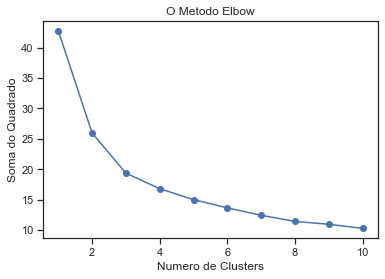

In [ ]:
# Método do Cotovelo
from sklearn.cluster import KMeans
cotovelo = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state=0)
    kmeans.fit(df_normalizado)
    cotovelo.append(kmeans.inertia_)

plt.plot(range(1, 11), cotovelo, marker='o')
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('Soma do Quadrado')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters = 3, init='random', random_state = 0)
kmeans.fit(df_normalizado)

KMeans(init='random', n_clusters=3, random_state=0)

In [ ]:
y_Kmeans = kmeans.fit_predict(df_normalizado)

In [ ]:
y_Kmeans

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
def plot_kmeans(cluster_centers, y_km, X):
    # X=X.values
    # plot
    plt.figure(figsize=(10, 10))
    plt.scatter(
        X[y_km == 0, 0], X[y_km == 0, 1],
        s=50, c='lightgreen',
        marker='s', edgecolor='black',
        label='cluster 1'
    )
    plt.scatter(
        X[y_km == 1, 0], X[y_km == 1, 1],
        s=50, c='orange',
        marker='o', edgecolor='black',
        label='cluster 2'
    )
    plt.scatter(
        X[y_km == 2, 0], X[y_km == 2, 1],
        s=50, c='lightblue',
        marker='v', edgecolor='black',
        label='cluster 3'
    )
    plt.scatter(
        cluster_centers[:, 0], cluster_centers[:, 1],
        s=250, marker='*',
        c='red', edgecolor='black',
        label='centroids'
    )
    plt.legend(scatterpoints=1)
    plt.grid()
    plt.show()

In [ ]:
df_normalizado

,mortalidade_infantil,exportacao,saude,importacao,renda,inflacao,expectativa_vida,taxa_fecundidade,pib
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242
...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143
163,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650
164,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299
165,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299


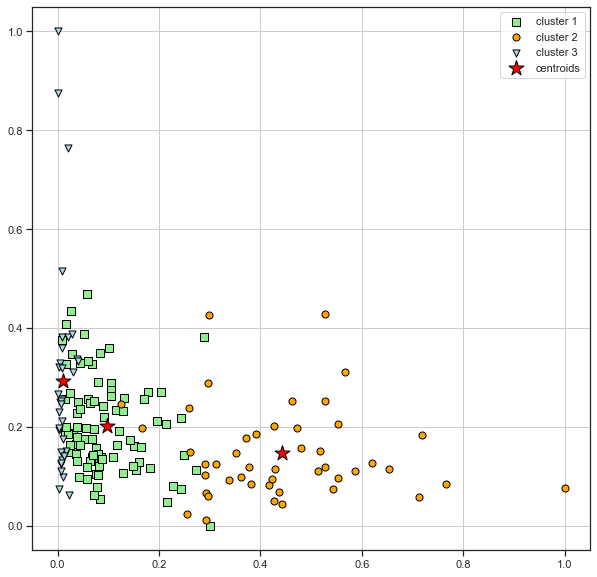

In [ ]:
plot_kmeans(kmeans.cluster_centers_, y_Kmeans, df_normalizado.values)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
    #treino
pca.fit(df_normalizado)
principalDf = pd.DataFrame(data = pca.transform(df_normalizado) , columns = ['principal component 1', 'principal component 2'])


In [ ]:
km = KMeans(n_clusters = 3, init='random', random_state = 0)
km.fit(principalDf)

KMeans(init='random', n_clusters=3, random_state=0)

In [ ]:
y= km.predict(principalDf)
y

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 0, 0, 2, 2, 2, 1, 0, 2, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 0,
       1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

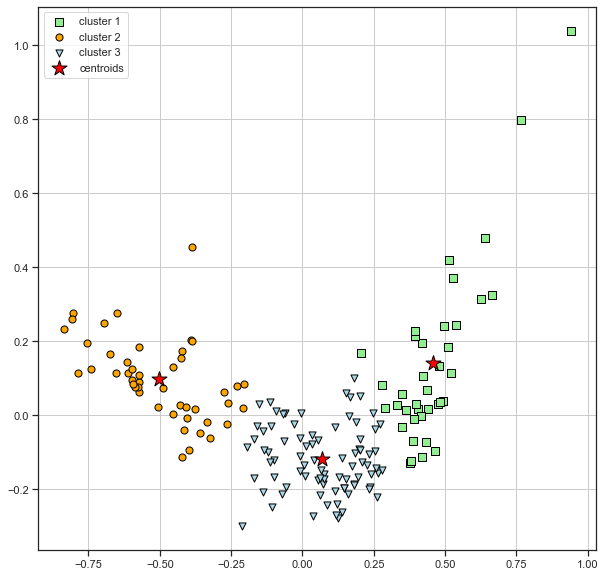

In [ ]:
plot_kmeans(km.cluster_centers_, y, principalDf.values)

In [ ]:
df_normalizado['labels'] = km.labels_

In [ ]:
df_normalizado['labels'].value_counts()

2    83
1    46
0    38
Name: labels, dtype: int64

In [ ]:
df['labels_cluster'] = y

In [ ]:
groupy = df.groupby(['labels_cluster'])

In [ ]:
groupy.get_group(1)

In [ ]:
df.loc[df['labels_cluster'] == 1]

,pais,mortalidade_infantil,exportacao,saude,importacao,renda,inflacao,expectativa_vida,taxa_fecundidade,pib,labels_cluster
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,1
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,1
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,1
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,1
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,1
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,1
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,1
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,1
